<a href="https://colab.research.google.com/github/asim5800/Bank-Marketing-Effectiveness-Prediction-/blob/main/Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [3]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
import matplotlib.pylab as pylab
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [5]:
#Importing models 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Importing model evaluation metrics and tools to balance our dataset
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import  RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import  precision_score, recall_score,f1_score,accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import KFold
from sklearn.utils import resample


In [6]:
#reading & loading dataset
df= pd.read_csv('/content/drive/MyDrive/Bank Marketing Effectiveness Prediction- Asim Siddiqui/Bank-full.csv', sep = ';')

In [ ]:
#checking information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
#we dont have any null values in our dataset so visualising last 5 observations
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
#statistical desciption of dataset
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
#renaming column of y to Subscribed
df.rename(columns = {'y' : 'Subscribed'}, inplace = True)

# ***Exploratory Data Analysis***

In [ ]:
#how many yes observations we have
df['Subscribed'].value_counts()

no     39922
yes     5289
Name: Subscribed, dtype: int64

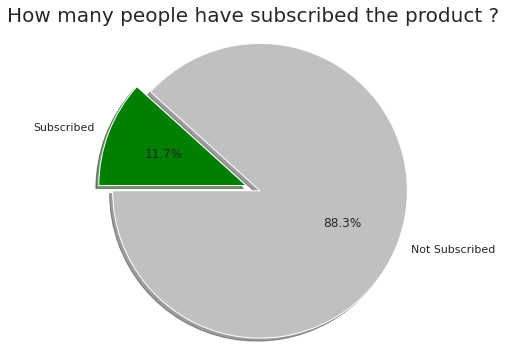

In [ ]:
#visualising how many customers have subscribed 
labels = 'Not Subscribed' , 'Subscribed'
sizes = df.Subscribed.value_counts()
colors = ['silver', 'green']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("How many people have subscribed the product ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

***Only 11.7% people have subscribed to our product***

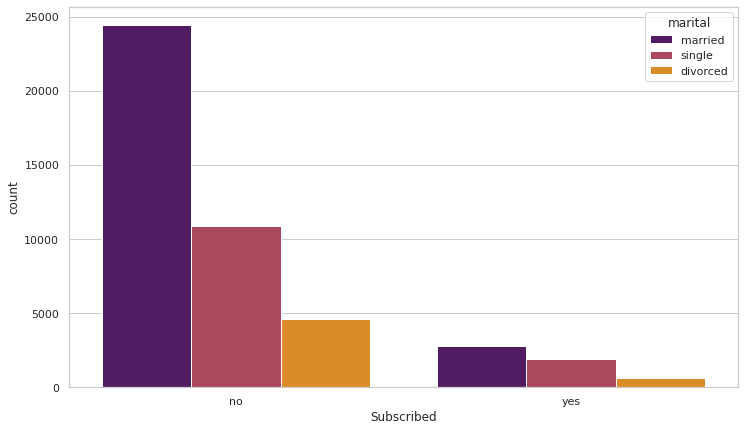

In [ ]:
#observing subscription according to Marital status
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(12, 7)
store_type=sns.countplot(x='Subscribed',hue='marital', data=df, palette="inferno")

***As we can see that married people are more tend to invest in product and have subscribed more in comparison to others.***

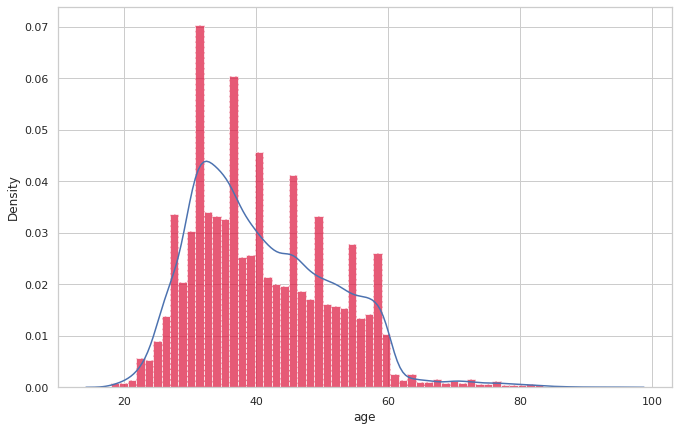

In [ ]:
#checkig age distribution in our dataset
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.distplot(df["age"],
                hist_kws = {'color':'#DC143C',
                     'linestyle':'--', 'alpha':0.7}, bins=60); 

***Our dataset have more number of people in late 20s and early 30s***

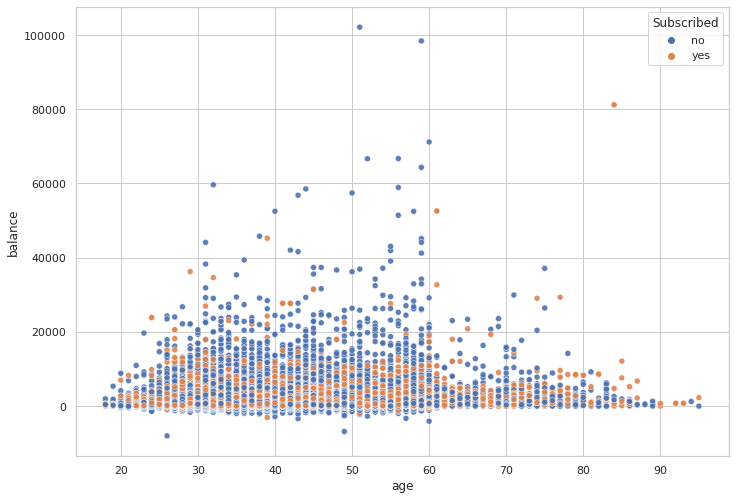

In [ ]:
#visualising age and balance with respect to whether customer has subscribed or not
sns.scatterplot(x="age", y="balance",hue='Subscribed',data=df,x_bins=50,y_bins=50,alpha=0.9);

***From above scatter plot we can see 40-60 age group people have subscribed the product. People having high balance have very low subscription rate.This also shows that our dataset have some balance below 0 and we can use this scatter plot to remove some outliers from our data set.***

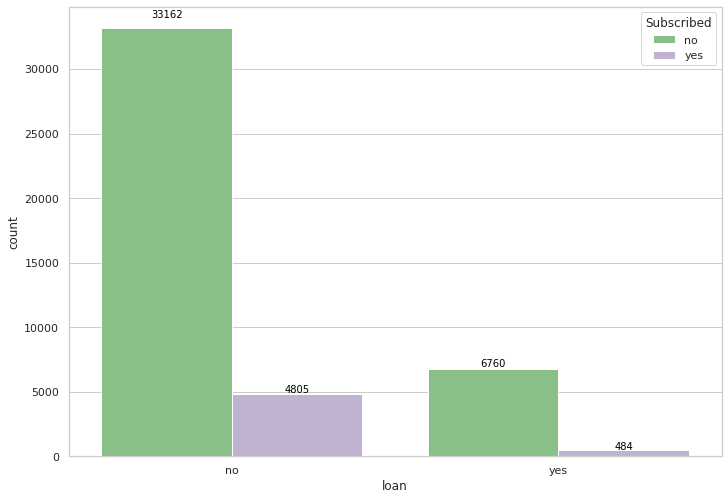

In [ ]:
#checking Loan and subscription rate of our bank product
g=sns.countplot(x="loan", hue="Subscribed", data=df,palette= 'Accent');

for p in g.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    g.annotate(f'{height}', (x + width/2, y + height*1.025), ha='center',color='black', size=10)

***This shows that people having no loans are tend to subsscribe the product more. It's clearly visible that ratio of the subscribed with respect to borrowers and non-borrowers is 1:10. So we need to invest more of our resources to non-borrowers or people having no loans in order to increase our subscription rate.***   

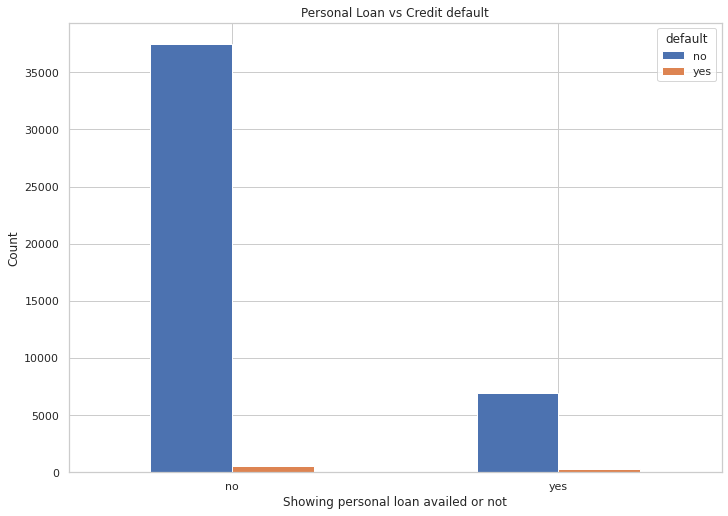

In [ ]:
#creating crosstab for observing defaulters and personal loan borrower
pd.crosstab(df.loan,df.default).plot(kind='bar');
plt.title("Personal Loan vs Credit default")
plt.xlabel('Showing personal loan availed or not')
plt.ylabel('Count');
plt.xticks(rotation=0);

***This shows that people who didn't take personal laons are defaulting at credit more.*** 

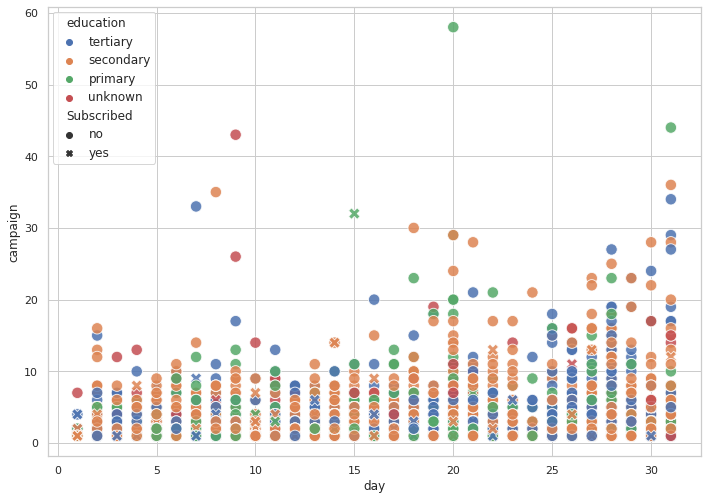

In [ ]:
#plotting education, campaign, day and sbscribed by taking 6000 random samples
sample=df.sample(6000)
sns.scatterplot(x="day", y="campaign", hue="education", data=sample,x_bins=50,y_bins=50,alpha=0.85, style="Subscribed",s=130 );

***This scatter plot shows that our campaign is more focused on people having secondary education. We also do more campaign on the month end. We need to focus on other education class as well also we need to be more uniform in our campaign accross all days of month.*** 

In [ ]:
#removing unknown occupation
df1 = df[df.job != 'unknown']

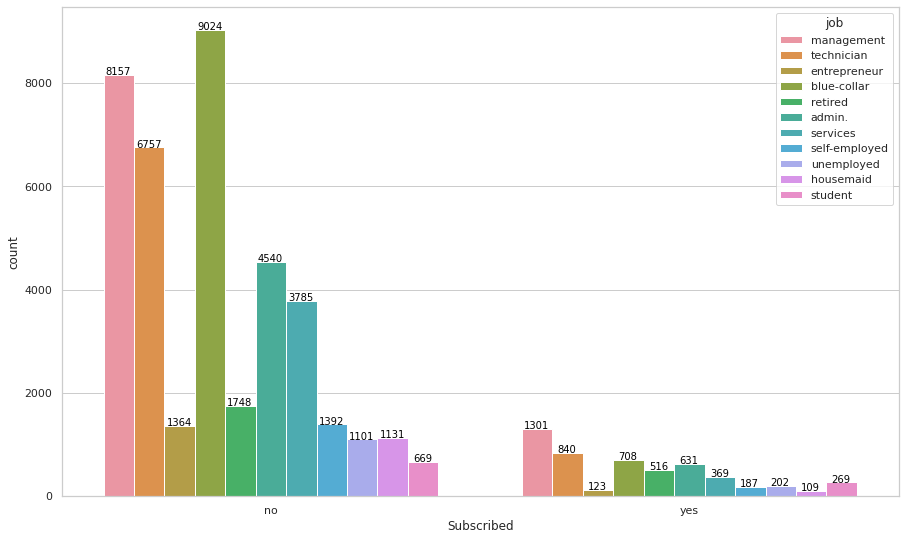

In [ ]:
#plotting graph for each of the job category along with the subscription information
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(15, 9)
job_sub=sns.countplot(x='Subscribed',hue='job', data=df1)

for p in job_sub.patches:
    job_sub.annotate(f'\n{p.get_height()}', (p.get_x()+0.035, p.get_height()),ha='center', va='baseline', color='black', size=10)


***This gives us the clear observation of each employment category who have subscribed or not. We can see that blue-collar people are the ones who rejected the campaign most and management employees are the one who subscribed the bank product the most. One important thing to note here is that student are also more inclined towards our product as their NO to YES proportion is low as comparison to others.***    

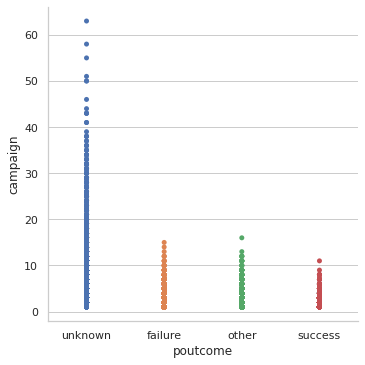

In [ ]:
#plotting poutcome and campaign relation
sns.catplot(x="poutcome", y="campaign",jitter=False, data=df1);

***We can see that our success rate for the campaign is higher when we make around 10 calls. This gives us more intuition that where we should channelize our resources while this marketing campaign.***  

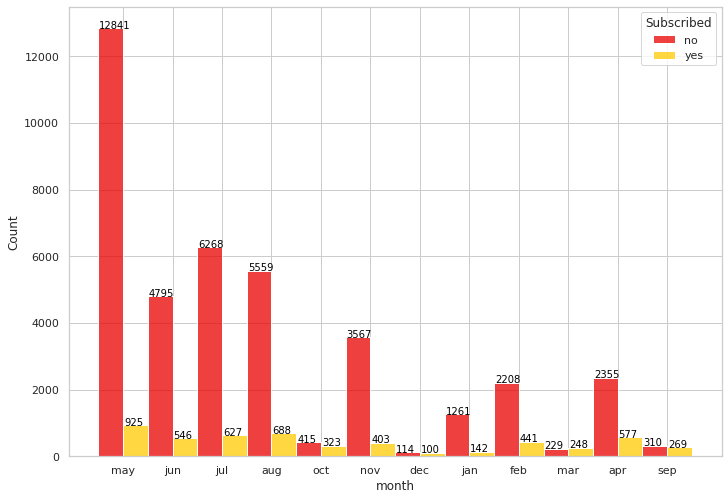

In [ ]:
#plotting monthly trend with respect to subscription 
sns.set_style("whitegrid")
mon_sub=sns.histplot(binwidth=0.4, x="month", hue="Subscribed", data=df, stat="count", multiple="dodge" ,palette='hot',bins=40);


for p in mon_sub.patches:
    mon_sub.annotate(f'\n{p.get_height()}', (p.get_x()+0.02, p.get_height()+0.03),color='black', size=10)

***We can observe that most of the subcriptions are coming from second quarter of the year that means we should devise more strategic approach for this specific period of year. Also one interesting thing is that in March is the best month as the only month having higher acceptance rate than rejection.***

In [ ]:
#creating another instance for further data work
df2=df.copy()

In [ ]:
#converting categorical feature into numeric
for label, content in df2.items():
    if not pd.api.types.is_numeric_dtype(content):
      df2[label]=pd.Categorical(content).codes #turning categories into numbers

In [ ]:
#showing the last 5 observation
df2.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribed
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0
45210,37,2,1,1,0,2971,0,0,0,17,9,361,2,188,11,1,0


In [ ]:
#dropping as contact information is not adding any useful information   
df_temp=df2.copy()
df_temp.drop('contact', axis=1,inplace=True)

In [ ]:
#converting all columns to int64
cols = ['job', 'marital','education','default', 'housing', 'loan', 'month', 'poutcome','Subscribed']
df_temp[cols] = df_temp[cols].applymap(np.int64)

In [ ]:
#checking information for our modified/processed dataset
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         45211 non-null  int64
 1   job         45211 non-null  int64
 2   marital     45211 non-null  int64
 3   education   45211 non-null  int64
 4   default     45211 non-null  int64
 5   balance     45211 non-null  int64
 6   housing     45211 non-null  int64
 7   loan        45211 non-null  int64
 8   day         45211 non-null  int64
 9   month       45211 non-null  int64
 10  duration    45211 non-null  int64
 11  campaign    45211 non-null  int64
 12  pdays       45211 non-null  int64
 13  previous    45211 non-null  int64
 14  poutcome    45211 non-null  int64
 15  Subscribed  45211 non-null  int64
dtypes: int64(16)
memory usage: 5.5 MB


In [ ]:
#statistical description of our dataset 
df_temp.describe()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,Subscribed
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.339762,1.167725,1.224813,0.018027,1362.272058,0.555838,0.160226,15.806419,5.523014,258.163080,2.763841,40.197828,0.580323,2.559974,0.116985
std,10.618762,3.272657,0.608230,0.747997,0.133049,3044.765829,0.496878,0.366820,8.322476,3.006911,257.527812,3.098021,100.128746,2.303441,0.989059,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,8.000000,3.000000,103.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


In [ ]:
#creating final working dataset
df_working=df_temp.copy()

In [ ]:
#dropping all balance and duration values which are less likely to subscribe as some balances are in negatives as well as shown above  
df_working = df_working.drop(df[(df_working.balance < 100)|(df_working.balance > 40000)|(df_working.duration < 5)].index)#removing those people having balance<100 and call <5

In [ ]:
#statistical description of filtered dataset
df_working.describe()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,Subscribed
count,32730.000000,32730.000000,32730.000000,32730.000000,32730.000000,32730.000000,32730.000000,32730.000000,32730.000000,32730.000000,32730.000000,32730.000000,32730.000000,32730.000000,32730.000000,32730.000000
mean,41.254751,4.365995,1.182921,1.241858,0.003300,1861.232844,0.549343,0.137764,15.682310,5.500642,263.931378,2.692209,43.323526,0.647510,2.520501,0.133547
std,10.833269,3.259616,0.600901,0.753564,0.057349,2963.402180,0.497567,0.344657,8.267834,3.077102,263.162558,2.932940,102.355735,2.525342,1.019543,0.340170
min,18.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,1.000000,0.000000,5.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,362.000000,0.000000,0.000000,8.000000,3.000000,105.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,833.000000,1.000000,0.000000,16.000000,6.000000,184.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,2081.750000,1.000000,0.000000,21.000000,8.000000,326.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,39385.000000,1.000000,1.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


In [ ]:
#information of processed dataset
df_working.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32730 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         32730 non-null  int64
 1   job         32730 non-null  int64
 2   marital     32730 non-null  int64
 3   education   32730 non-null  int64
 4   default     32730 non-null  int64
 5   balance     32730 non-null  int64
 6   housing     32730 non-null  int64
 7   loan        32730 non-null  int64
 8   day         32730 non-null  int64
 9   month       32730 non-null  int64
 10  duration    32730 non-null  int64
 11  campaign    32730 non-null  int64
 12  pdays       32730 non-null  int64
 13  previous    32730 non-null  int64
 14  poutcome    32730 non-null  int64
 15  Subscribed  32730 non-null  int64
dtypes: int64(16)
memory usage: 4.2 MB


In [ ]:
#checking how many subscribed count we have
df_working['Subscribed'].value_counts()

0    28359
1     4371
Name: Subscribed, dtype: int64

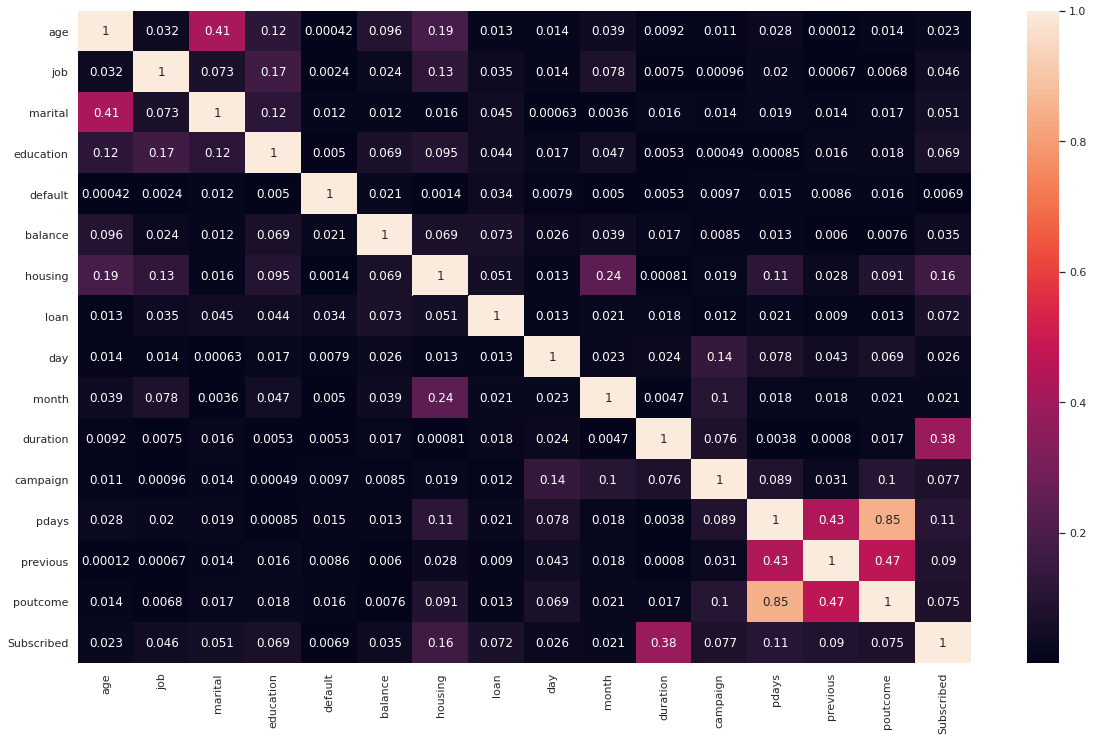

In [ ]:
#plotting correlation heatmap for to get more clear picture
plt.subplots(figsize=(20,12))
sns.heatmap(df_working.corr().abs(), annot=True);

***This shows that duration and housing are highly correlated with subscribed(Y/N). Also pdays are also impacting poutcome.***

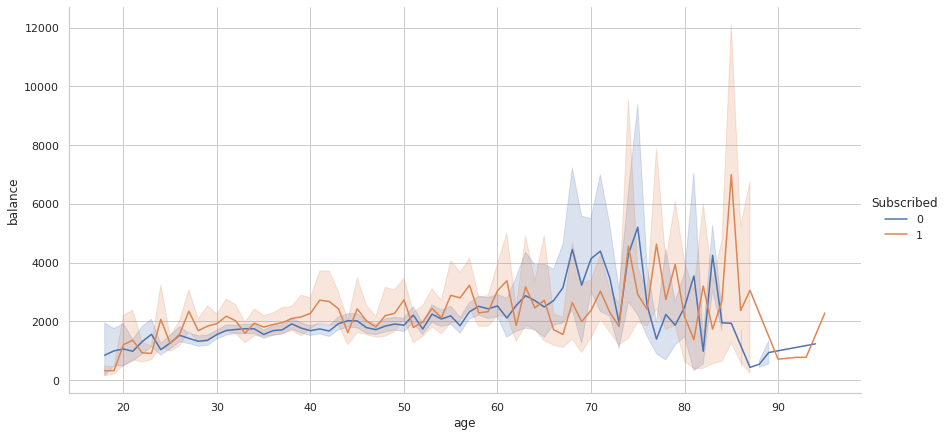

In [ ]:
#visualising age and balance relation with respect to subscribed
sns.relplot(x="age", y="balance", kind="line", data=df_working, hue='Subscribed',height=6,aspect=2 );

***We can see that for age 20-60 people with having higher balance  are the ones who subscribe more. But as we move towards higher age we see mixed distribution of subscribing term deposit.*** 

# ***Implementation of models***

***First we do implementation on our raw data***

In [ ]:
#taking a quick glance of our dataset
df_working.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,Subscribed
0,58,4,1,2,0,2143,1,0,5,8,261,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,5,8,92,1,-1,0,3,0
5,35,4,1,2,0,231,1,0,5,8,139,1,-1,0,3,0
6,28,4,2,2,0,447,1,1,5,8,217,1,-1,0,3,0
8,58,5,1,0,0,121,1,0,5,8,50,1,-1,0,3,0


In [ ]:
#splitting data into X and y
X=df_working.drop('Subscribed',axis=1)
y= df_working['Subscribed']

In [ ]:
#creating training and testing data by keeping ratio of 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
#checking head of training set
X_train.head(2)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome
17136,26,1,1,0,0,133,0,1,25,5,57,3,-1,0,3
44634,77,5,1,0,0,1492,0,0,1,11,663,1,208,2,1


In [ ]:
#shape of our training and testing data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((22911, 15), (22911,), (9819, 15), (9819,))

In [ ]:
#putting models in a dictionary

models= {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier(),
         'XGboost': XGBClassifier() }


#create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
  """
  Fits and evaluates ML models
  models: a dictionary of Scikit Learn Classifier models
  X_train, y_train: training data
  X_test, y_test: testing data
  """

  #set random seed
  np.random.seed(101)  

  #make a dictionary to keep model score
  model_scores={}

  #loop through models
  for name,model in models.items():
    #fit the model to the data
    model.fit(X_train, y_train)
    #evaluate the model and append its score to model score
    model_scores[name]=model.score(X_test, y_test)
  return model_scores  




In [ ]:
#showing scores of our models
model_scores =fit_and_score(models=models, 
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)

model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.8647520114064569,
 'Logistic Regression': 0.8684183725430288,
 'Random Forest': 0.88613911803646,
 'XGboost': 0.8859354313066504}

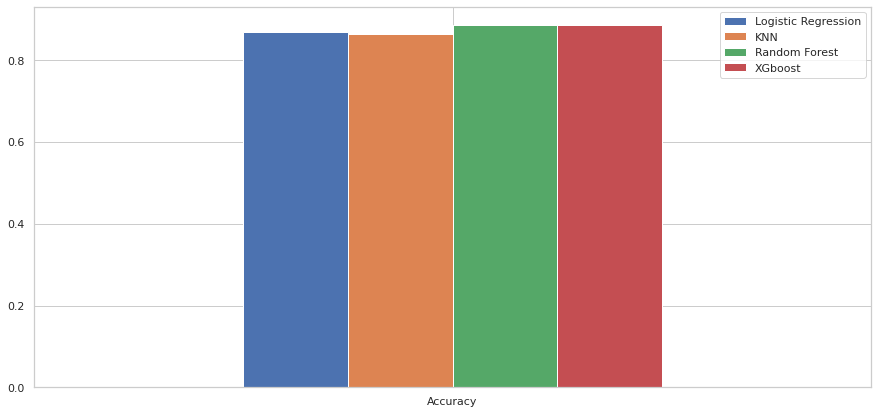

In [ ]:
#model comparison
model_compare = pd.DataFrame(model_scores,index=['Accuracy'])# as default score matrix is accuracy
model_compare.plot.bar(rot=0,figsize=(15, 7));

We have our baseline model now we try to improve these

In [ ]:
#hyperparameter tuning of KNN
train_scores = []
test_scores = []

#create a list of different values of N NEIGHBOURS
neighbors= range(1,21)

#setup KNN instance ,20 different knn models
knn = KNeighborsClassifier()

#loop through different n neighbours
for i in neighbors:
  knn.set_params(n_neighbors= i)
  
  #fitting 
  knn.fit(X_train,y_train)

  #update training score list
  train_scores.append(knn.score(X_train,y_train))

  #update the test score list
  test_scores.append(knn.score(X_test,y_test))


In [ ]:
#at what value of k we have maximum score
test_scores.index(max(test_scores))

17

Maximum KNN score on the test data:86.85% on k value as 17


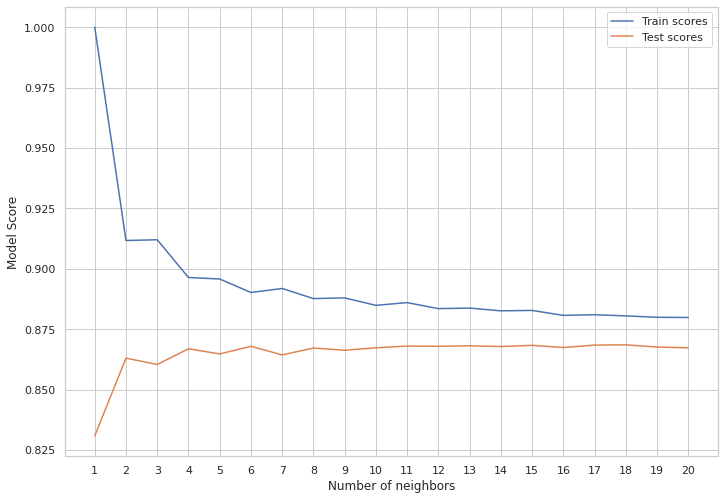

In [ ]:
#plotting KNN with tuned hyperparameter
plt.plot(neighbors,train_scores,label='Train scores' )
plt.plot(neighbors,test_scores,label='Test scores')
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data:{max(test_scores)*100:.2f}% on k value as 17")

Again even after tuning KNN there is no such significant improvement in our model so we drop this and move on to other algorithm to tune.


In [ ]:
#creating hyperparameter grid for Logistic regression
log_reg_grid={'C': np.logspace(-4,4,20),
              'solver':['liblinear']}



#create hyperparameter grid for Random forest
rf_grid= {'n_estimators' : np.arange(10,1000,50),
          'max_depth' : [None, 3,5,10],
          'min_samples_split' : np.arange(2,20,2),
          'min_samples_leaf' : np.arange(1,20,2),
          "max_features": [0.5,1,"sqrt","auto"],
          }

In [ ]:
#tune logistic regression
np.random.seed(42)
#setting up random search hyperparameter search for logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)


# fit random search hyperparameter search for logistic regression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   28.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [ ]:
#showing best parameters for logistic regression after search
rs_log_reg.best_params_

{'C': 3792.690190732246, 'solver': 'liblinear'}

In [ ]:
#displaying model score
rs_log_reg.score(X_test,y_test)

0.8723902637743151

In [ ]:
#Hyperparameter tuning with randomize search cv for random forest
#np.random.seed(42)
#setup random hyperparameter search for RandomForest Classifier 
#rs_rf = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1),
#                                param_distributions=rf_grid,
#                                cv=5,
#                                n_iter=20,
#                                verbose=True)

#fit random hyperparamter search model for RandomForestClassifier()

#rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  8.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
# displaying best hyperparameters for RandomForestClassifier()
#rs_rf.best_params_

{'max_depth': 10,
 'max_features': 0.5,
 'min_samples_leaf': 5,
 'min_samples_split': 16,
 'n_estimators': 910}

In [ ]:
#evaluate the randomiZed searcgF Random Forest classifier model
#rs_rf.score(X_test,y_test)

0.8905183827273653

In [ ]:
#applying best parameters to our RandomForest model
rfclfr = RandomForestClassifier(n_jobs=2, random_state = 12,
                                max_depth = 10,
                                max_features = 0.5,
                                min_samples_leaf= 5,
                                min_samples_split = 16,
                                n_estimators = 910)#criterion = entopy,gini
rfclfr.fit(X_train, y_train)
rfclfrpred = rfclfr.predict(X_test)

In [ ]:
# tune using Gridsearch CV for logistic regression

log_reg_grid={'C': np.logspace(-4,4,20),
              'solver':['liblinear']}



#setup grid hyperparameter search for Logistic regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)



#fit grid hyperparameter search model
gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   29.0s finished


In [ ]:
#best parameters after Gridsearch CV
gs_log_reg.best_params_

{'C': 3792.690190732246, 'solver': 'liblinear'}

In [ ]:
#score after Gridsearch CV 
gs_log_reg.score(X_test,y_test)

0.8723902637743151

RandomForest is working at highest score as 89%.

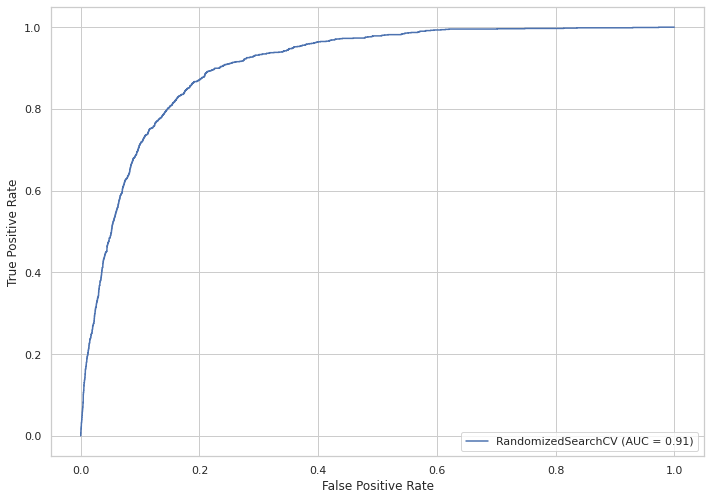

In [ ]:
#roc curve true+ rate against false+ rate
plot_roc_curve(rs_rf, X_test,y_test); 

In [ ]:
# make prediction with tuned model
y_preds= rs_rf.predict(X_test)

In [ ]:
y_preds

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#confusion matrix for our classification model
cf_matrix=confusion_matrix(y_test,y_preds)
print(cf_matrix)

[[8180  325]
 [ 750  564]]


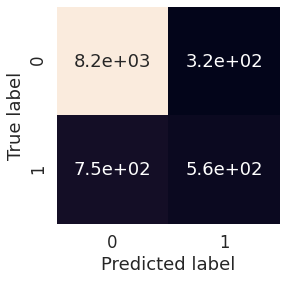

In [ ]:
#visualising the confusion matrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
  """
  plot for confusion matrix using heatmap 

  """
  fig,ax= plt.subplots(figsize=(4,4))
  ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                 annot=True,              
                 cbar=False)
  plt.xlabel("Predicted label")
  plt.ylabel("True label")
  
plot_conf_mat(y_test,y_preds)  

***As we can see our model is showing 750 FALSE NEGATIVES on our raw data this means that prospect has subscribed but model showing he has not subscribed (falsely labelled as negative). In this case  this is acceptable for company generating revenue but for situtation like false positive it may hamper company startegies adveresly as false postive means customer has subscribed according to model even though he didn't. This creates a high chances that we may loose that specific prospect.***

In [ ]:
#classification report of our model
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      8505
           1       0.63      0.43      0.51      1314

    accuracy                           0.89      9819
   macro avg       0.78      0.70      0.73      9819
weighted avg       0.88      0.89      0.88      9819



***Here accuracy can be misleading as we have higly imbalanced data. Here PRECISION should be considered as important metric for model evaluation. Here we have poor f1 score and poor precision for class 1. We need to fix this bacause model having less false positive will have higher precision.*** 

#***Fixing our unbalanced data set with oversampling and applying a model***

In [ ]:
#separating unbalanced dataset in two part of majority(as we have more observations of NO) and minority 
df_majority = df_working[df_working['Subscribed'] == 0]

In [ ]:
#separating datasets in minority
df_minority = df_working[df_working['Subscribed'] == 1]

In [ ]:
#statistical description of minority dataset
df_minority.describe()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,Subscribed
count,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.0
mean,41.885610,4.748570,1.261267,1.373827,0.002288,2121.980096,0.340654,0.074582,15.138641,5.336994,521.037520,2.113475,70.923358,1.224205,2.326470,1.0
std,13.757551,3.156798,0.636357,0.748938,0.047782,3083.322303,0.473983,0.262747,8.477943,3.447767,386.596684,1.908773,119.679952,2.641175,1.026104,0.0
min,18.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,1.000000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000,1.0
25%,31.000000,2.000000,1.000000,1.000000,0.000000,429.000000,0.000000,0.000000,8.000000,2.000000,236.000000,1.000000,-1.000000,0.000000,2.000000,1.0
50%,38.000000,4.000000,1.000000,1.000000,0.000000,1058.000000,0.000000,0.000000,15.000000,6.000000,406.000000,2.000000,-1.000000,0.000000,3.000000,1.0
75%,51.000000,8.000000,2.000000,2.000000,0.000000,2600.000000,1.000000,0.000000,22.000000,8.000000,705.000000,2.000000,101.000000,2.000000,3.000000,1.0
max,95.000000,11.000000,2.000000,3.000000,1.000000,36252.000000,1.000000,1.000000,31.000000,11.000000,3881.000000,32.000000,854.000000,58.000000,3.000000,1.0


In [ ]:
#FIX IMBALANCED DATASET 
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    
                                 n_samples= int(4640*3),    #we can create more to add more observations with 1 
                                 random_state=123
                                 ) 

In [ ]:
#combining the datasets after oversampling minority class data 
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [ ]:
#observing the change by how much we oversampled our dataset
df_upsampled["Subscribed"].value_counts() 

0    28359
1    13920
Name: Subscribed, dtype: int64

In [ ]:
#creating new 'y' for upsampled / fixed dataset for testing
y_new = df_upsampled['Subscribed']

In [ ]:
#train test split
X_Train, X_Test, y_Train, y_Test = train_test_split(df_upsampled.drop('Subscribed', axis = 1), y_new, test_size = 0.1942313295, random_state = 101)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
#scaling our dataset for fit
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [ ]:
#RandomForest Classifier implmentation on our balanced dataset with few hyperparameters 
rfc = RandomForestClassifier(n_estimators = 200, n_jobs=2, random_state = 12)#criterion = entopy,gini
rfc.fit(X_Train, y_Train)
rfcpred = rfc.predict(X_Test)
RFCCV = (cross_val_score(rfc, X_Train, y_Train, cv=k_fold, n_jobs=2, scoring = 'accuracy').mean())

In [ ]:
#displaying score 
models = pd.DataFrame({
                'Models': ['Random Forest Classifier'],
                'Score':  [RFCCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
0,Random Forest Classifier,0.946165


In [ ]:
#printing confusion matrix
print('RFC Confusion Matrix\n', confusion_matrix(y_test, rfcpred))

RFC Confusion Matrix
 [[5234  321]
 [ 100 2557]]


In [ ]:
#printing classification report
print('RFC Reports\n',classification_report(y_test, rfcpred))

RFC Reports
               precision    recall  f1-score   support

           0       0.98      0.94      0.96      5555
           1       0.89      0.96      0.92      2657

    accuracy                           0.95      8212
   macro avg       0.93      0.95      0.94      8212
weighted avg       0.95      0.95      0.95      8212



***As we can see that our precision has a significant improvement from 63% to 89%. F1 score has also improved. We can further increase these evaluation metrics by tweaking more on sampling and hyperparamters of model.***   

In [ ]:
#feature importance of random forest
rfclfr.feature_importances_

array([7.53154572e-02, 1.67317084e-02, 1.05673582e-02, 1.00666806e-02,
       1.72603582e-05, 4.54114995e-02, 5.52617251e-02, 3.50338835e-03,
       4.46104977e-02, 9.19613781e-02, 4.17703776e-01, 1.44474777e-02,
       8.00143912e-02, 2.41754559e-02, 1.10211946e-01])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


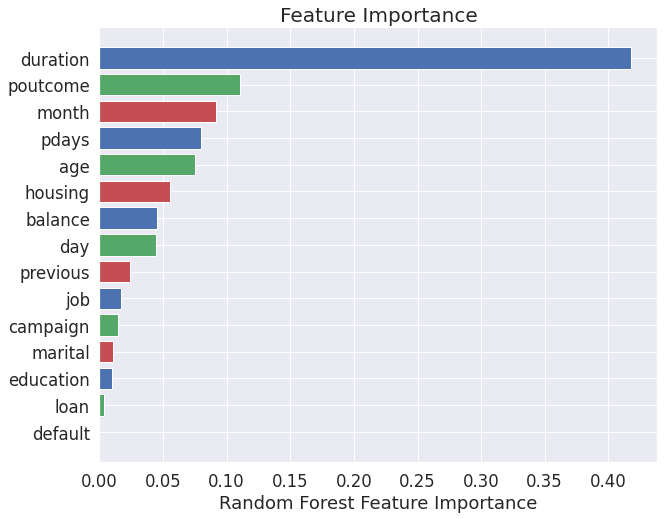

In [ ]:
#plotting feature importance
plt.figure(figsize=(10,8))
sorted_idx = rfclfr.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], rfclfr.feature_importances_[sorted_idx],color='rgb',align='center')
plt.xlabel("Random Forest Feature Importance")
plt.title('Feature Importance', fontsize=20);

***As our model shows that poutcome,pdays,month are in top 5 but DURATION is the most important feature in this bank marketing effectiveness prediction.*** 

#***Removing DURATION from dataset and applying XGBoost***


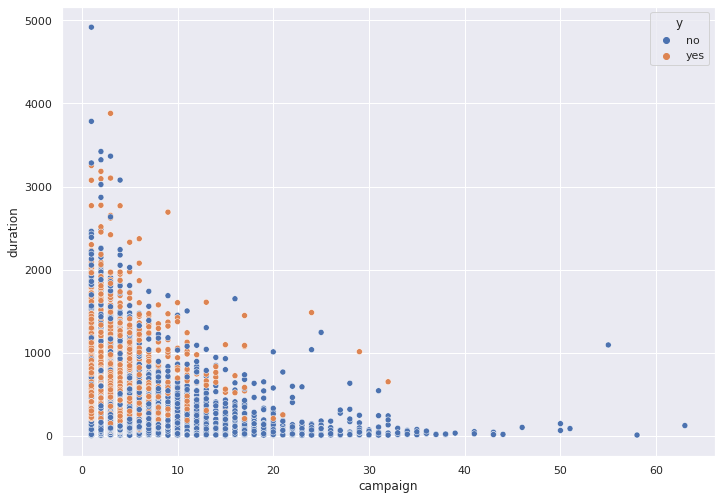

In [12]:
sns.scatterplot(x='campaign', y='duration', hue= 'y',data= df);# here duration is avialable but in real world data set this may not be the case

In [7]:
#dropping duration column
dfxg=  df.drop('duration', 1)
dfxg.drop('pdays',axis=1,inplace=True)
dfxg.drop('day',axis=1,inplace=True)
dfxg.drop('contact',axis=1,inplace=True)


In [8]:
dfxg.head()

,age,job,marital,education,default,balance,housing,loan,month,campaign,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,may,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,may,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,may,1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,may,1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,may,1,0,unknown,no


In [9]:
dfxg['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [10]:
# import preprocessing from sklearn
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
dfxg= dfxg.apply(le.fit_transform)
dfxg.head()

,age,job,marital,education,default,balance,housing,loan,month,campaign,previous,poutcome,y
0,40,4,1,2,0,3036,1,0,8,0,0,3,0
1,26,9,2,1,0,945,1,0,8,0,0,3,0
2,15,2,1,1,0,918,1,1,8,0,0,3,0
3,29,1,1,3,0,2420,1,0,8,0,0,3,0
4,15,11,2,3,0,917,0,0,8,0,0,3,0


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dfxg[dfxg.columns] = scaler.fit_transform(dfxg)
dfxg.head()

,age,job,marital,education,default,balance,housing,loan,month,campaign,previous,poutcome,y
0,0.526316,0.363636,0.5,0.666667,0.0,0.423608,1.0,0.0,0.727273,0.0,0.0,1.0,0.0
1,0.342105,0.818182,1.0,0.333333,0.0,0.131854,1.0,0.0,0.727273,0.0,0.0,1.0,0.0
2,0.197368,0.181818,0.5,0.333333,0.0,0.128087,1.0,1.0,0.727273,0.0,0.0,1.0,0.0
3,0.381579,0.090909,0.5,1.000000,0.0,0.337659,1.0,0.0,0.727273,0.0,0.0,1.0,0.0
4,0.197368,1.000000,1.0,1.000000,0.0,0.127948,0.0,0.0,0.727273,0.0,0.0,1.0,0.0


In [12]:
#performing oversampling
X=dfxg.drop('y',axis=1)
y= dfxg['y']

from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
SMote= SMOTETomek(ratio=0.7)
X_res,y_res = SMote.fit_sample(X,y)

In [13]:
y_res

array([0., 0., 0., ..., 1., 1., 1.])

In [14]:
import collections, numpy
collections.Counter(y_res)


Counter({0.0: 38765, 1.0: 26788})

In [15]:
#Splitting the Dataset inro Train Set and Test Set
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

In [46]:
#using XGBoost in RandomizedSearch to get best result
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
folds = 3
param_comb = 5
prams={
    'learning_rate':[0.01,0.03,0.05],
     'n_estimators':[100,200,500,1000],
     'max_depth':[3,5,10],
    
    }    
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

xgb=XGBClassifier()

#xgb.fit(X_train, y_train)
random_search_xgb = RandomizedSearchCV(xgb,param_distributions= prams ,n_iter=param_comb, scoring='roc_auc', n_jobs=4, verbose=3, random_state=1001 )
random_search_xgb.fit(X_train, y_train)
y_probs_train = random_search_xgb.predict_proba(X_train)
y_probs_test = random_search_xgb.predict_proba(X_test)
y_predicted_train = random_search_xgb.predict(X_train)
y_predicted_test = random_search_xgb.predict(X_test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed: 28.8min finished
/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:53:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [47]:
print(classification_report(y_test,y_predicted_test))

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      7779
         1.0       0.95      0.83      0.89      5332

    accuracy                           0.91     13111
   macro avg       0.92      0.90      0.91     13111
weighted avg       0.92      0.91      0.91     13111



***Conclusion-***

***We tried out various model on raw data and checked for precision and other evaluation metrics. We also performed oversampling and then applied our machine learning models to get the best and efficient output.***

***EDA includes various relationship between features. Applying ML models showed that poutcome i.e. outcome of the previous marketing campaign plays an important role in this marketing campaign.***

***We dropped certain features and values to get the more cleaner, unbiased data to feed into our models.***

***As evaluation metric we focused on precision & recall. Recall means that prospect has subscribed but model showing he has not subscribed (falsely labelled as negative). In this case  this is acceptable for company generating revenue but for situtation like false positive it may hamper company startegies adveresly as false postive means customer has subscribed according to model even though he didn't. This creates a high chances that we may loose that specific prospect.***